In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

PROCESS RAW DATA

In [55]:
file_path = "benchmark_raw_results.csv"  # replace with your file path
agg_df = pd.read_csv(file_path, sep=';')

# Replace comma with dot for numeric columns and convert to float
numeric_cols = ['execution_time_ms', 'memory_usage_mb']
for col in numeric_cols:
    agg_df[col] = agg_df[col].str.replace(',', '.').astype(float)

agg_df

,run_id,matrix_size,sparse_level_percent,implementation,execution_time_ms,memory_usage_mb,repetition,timestamp,warm-up,notes
0,run_3d20e101,64,0,unoptimized,32.852,1.440,1,2025-11-13T13:28:18.1830179,1,No notes
1,run_11aced28,64,0,unoptimized,31.867,0.480,2,2025-11-13T13:28:18.2331585,1,No notes
2,run_de79f421,64,0,unoptimized,9.759,0.315,3,2025-11-13T13:28:18.2785518,1,No notes
3,run_ad307bc1,64,0,unoptimized,25.996,0.434,4,2025-11-13T13:28:18.2945424,1,No notes
4,run_6afeaae0,64,0,unoptimized,27.750,0.420,5,2025-11-13T13:28:18.3255892,1,No notes
...,...,...,...,...,...,...,...,...,...,...
595,run_bc06deb9,512,95,optimized,3.193,14.125,11,2025-11-13T17:26:54.7496884,0,No notes
596,run_0e82dfb6,512,95,optimized,3.192,13.834,12,2025-11-13T17:26:56.7619976,0,No notes
597,run_bdec27b9,512,95,optimized,8.317,-33.321,13,2025-11-13T17:26:58.7757709,0,No notes
598,run_22b774df,512,95,optimized,3.203,14.203,14,2025-11-13T17:27:00.7900119,0,No notes


In [56]:
# Remove warm-up rows
agg_df = agg_df[agg_df['warm-up'] != 1]

# Remove rows with negative memory usage
agg_df = agg_df[agg_df['memory_usage_mb'] >= 0]

# Drop unnecessary columns
columns_to_drop = ['run_id', 'timestamp', 'warm-up', 'notes']
agg_df = agg_df.drop(columns=columns_to_drop)

# Save cleaned data
agg_df.to_csv('benchmark_cleaned_results.csv', index=False, sep=';')

print("Data cleaned and saved to 'benchmark_cleaned_results.csv'.")
agg_df


Data cleaned and saved to 'benchmark_cleaned_results.csv'.


,matrix_size,sparse_level_percent,implementation,execution_time_ms,memory_usage_mb,repetition
5,64,0,unoptimized,25.926,0.415,6
6,64,0,unoptimized,24.901,0.421,7
7,64,0,unoptimized,25.549,0.416,8
8,64,0,unoptimized,28.126,0.418,9
9,64,0,unoptimized,14.202,0.300,10
...,...,...,...,...,...,...
593,512,95,optimized,3.210,14.086,9
595,512,95,optimized,3.193,14.125,11
596,512,95,optimized,3.192,13.834,12
598,512,95,optimized,3.203,14.203,14


In [57]:
agg_df['execution_time_ms'] = pd.to_numeric(agg_df['execution_time_ms'].astype(str).str.replace(',', '.'), errors='coerce')
agg_df['memory_usage_mb'] = pd.to_numeric(agg_df['memory_usage_mb'].astype(str).str.replace(',', '.'), errors='coerce')

# Define the grouping columns
group_cols = ['matrix_size', 'sparse_level_percent', 'implementation']

# Aggregation dictionary
agg_dict = {
    'execution_time_ms': ['mean', 'median', 'std'],
    'memory_usage_mb': ['mean', 'median', 'std']
}

# Perform the aggregation
agg_df = agg_df.groupby(group_cols).agg(agg_dict).reset_index()

# Flatten MultiIndex columns
agg_df.columns = ['_'.join(filter(None, col)).rstrip('_') for col in agg_df.columns.values]

# Save to CSV
agg_df.to_csv('benchmark_aggregated_results.csv', index=False, sep=';')

print("Aggregated data saved to 'benchark_aggregated_results.csv'.")

Aggregated data saved to 'benchark_aggregated_results.csv'.


In [58]:
agg_df

,matrix_size,sparse_level_percent,implementation,execution_time_ms_mean,execution_time_ms_median,execution_time_ms_std,memory_usage_mb_mean,memory_usage_mb_median,memory_usage_mb_std
0,64,0,optimized,0.256500,0.2425,0.052092,0.198400,0.0000,0.256771
1,64,0,unoptimized,18.168200,14.4515,7.009030,0.347900,0.3040,0.059955
2,64,50,optimized,0.141400,0.1320,0.028293,0.188400,0.0285,0.233373
3,64,50,unoptimized,3.291100,3.3285,0.293552,0.183400,0.1830,0.001647
4,64,75,optimized,0.105900,0.0970,0.032195,0.398700,0.4080,0.035333
5,64,75,unoptimized,0.745500,0.7525,0.053606,0.102500,0.1020,0.001080
6,64,90,optimized,0.040500,0.0390,0.004478,0.159000,0.0000,0.205750
7,64,90,unoptimized,0.148400,0.1495,0.015196,0.055000,0.0550,0.000000
8,64,95,optimized,0.011000,0.0110,0.000000,0.000000,0.0000,0.000000
9,64,95,unoptimized,0.053800,0.0520,0.003584,0.037000,0.0370,0.000000


GENERATE GRAPHS

In [59]:
def plot_lines(x: list, y: list, file_name: str, labels: list[str], title: str, xlabel: str, ylabel: str, figsize=(8,5), markers=True):
    """
    Plot multiple lines on a single graph with x values as ticks, and save it to a file.

    Parameters:
        x (list): X-axis values
        y (list of lists): Each inner list is a line's Y-axis values
        labels (list of str): Labels for each line
        title (str): Graph title
        xlabel (str): X-axis label
        ylabel (str): Y-axis label
        figsize (tuple, optional): Figure size
        markers (bool, optional): Show markers on data points
        file_name (str): Name of the file to save the plot in './graphs'
    """
    plt.figure(figsize=figsize)

    # Plot each line
    for i, y_values in enumerate(y):
        label = labels[i] if labels is not None else f"Line {i+1}"
        if markers:
            plt.plot(x, y_values, marker='o', label=label)
        else:
            plt.plot(x, y_values, label=label)

    # Set x-axis ticks to match x values
    plt.xticks(x, x, rotation=45)

    plt.grid(True, linestyle='--', alpha=0.5)
    if labels:
        plt.legend()
    if title:
        plt.title(title)
    if xlabel:
        plt.xlabel(xlabel)
    if ylabel:
        plt.ylabel(ylabel)

    plt.tight_layout()

    # Save plot
    os.makedirs('./graphs', exist_ok=True)
    full_path = os.path.join('./graphs', file_name)
    plt.savefig(full_path)
    print(f"Plot saved to {full_path}")

    plt.show()

In [60]:
sizes = [64, 128, 256, 512]
sparsities = [0, 50, 75, 90, 95]

Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) times: [0.2565, 1.4544000000000001, 10.9113, 83.2269]
Unoptimized times: [18.1682, 129.4442, 3104.8367000000003, 48377.553700000004]
Plot saved to ./graphs\time_mean_vs_size_sparsity0.png


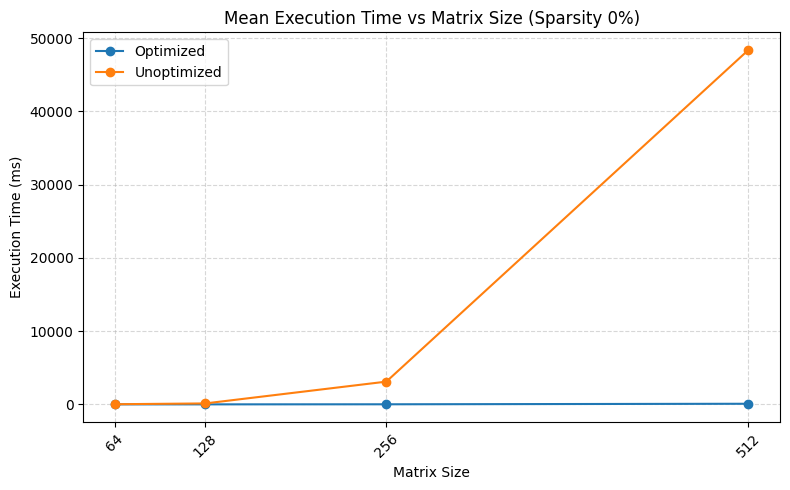

In [61]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract execution times
optimized_times = df_sparsity0[df_sparsity0['implementation'] == 'optimized']['execution_time_ms_mean'].tolist()
unoptimized_times = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) times:", optimized_times)
print("Unoptimized times:", unoptimized_times)

plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized', 'Unoptimized'],
    title='Mean Execution Time vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_mean_vs_size_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) median times: [0.2425, 1.4344999999999999, 10.2625, 76.676]
Unoptimized median times: [14.4515, 127.982, 3083.8, 51343.1805]
Plot saved to ./graphs\time_median_vs_size_sparsity0.png


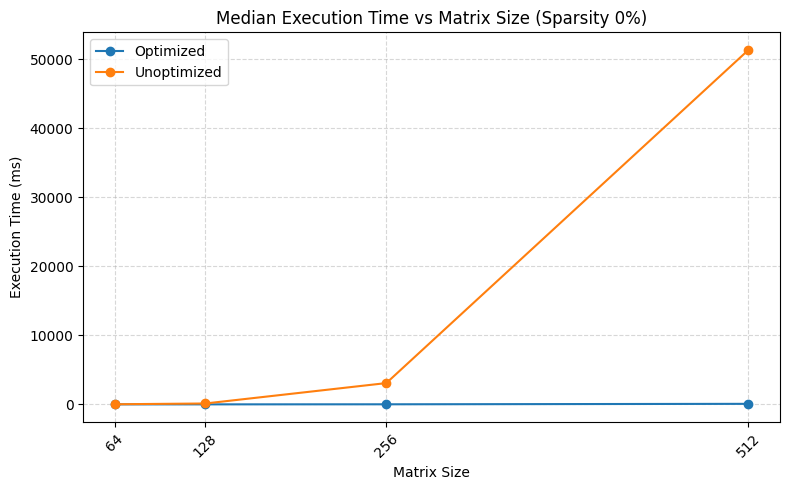

In [62]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract median execution times
optimized_times = df_sparsity0[df_sparsity0['implementation'] == 'optimized']['execution_time_ms_median'].tolist()
unoptimized_times = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['execution_time_ms_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median times:", optimized_times)
print("Unoptimized median times:", unoptimized_times)

# Plot median execution times
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized', 'Unoptimized'],
    title='Median Execution Time vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_median_vs_size_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) std: [0.05209233255586767, 0.07005109246511115, 2.3089053226342755, 15.992748519598221]
Unoptimized std: [7.009029617413368, 12.817670500783935, 143.5510738773641, 7303.541862180508]
Plot saved to ./graphs\time_std_vs_size_sparsity0.png


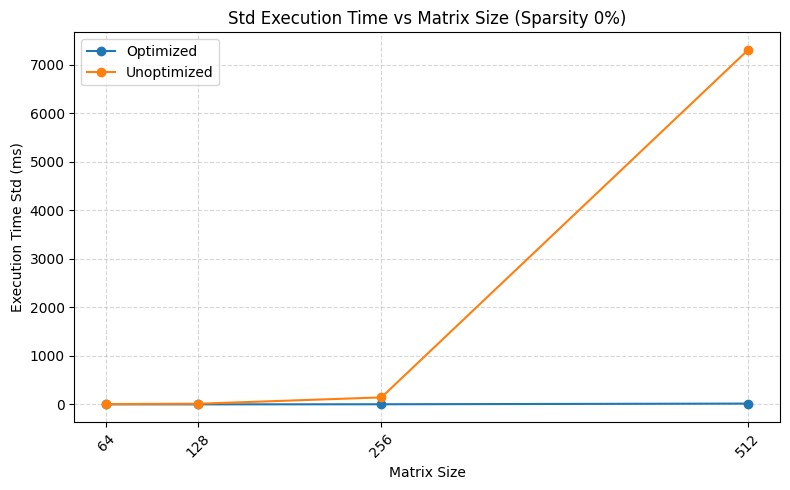

In [63]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Extract execution time standard deviations
optimized_std = df_sparsity0[df_sparsity0['implementation'] == 'optimized']['execution_time_ms_std'].tolist()
unoptimized_std = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['execution_time_ms_std'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) std:", optimized_std)
print("Unoptimized std:", unoptimized_std)

# Plot execution time standard deviations
plot_lines(
    x=sizes,
    y=[optimized_std, unoptimized_std],
    labels=['Optimized', 'Unoptimized'],
    title='Std Execution Time vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Execution Time Std (ms)',
    file_name='time_std_vs_size_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) times: [0.14140000000000003, 0.616, 4.0504, 22.19242857142857]
Unoptimized times: [3.2911, 30.3522, 534.205, 12671.4394]
Plot saved to ./graphs\time_mean_vs_size_sparsity50.png


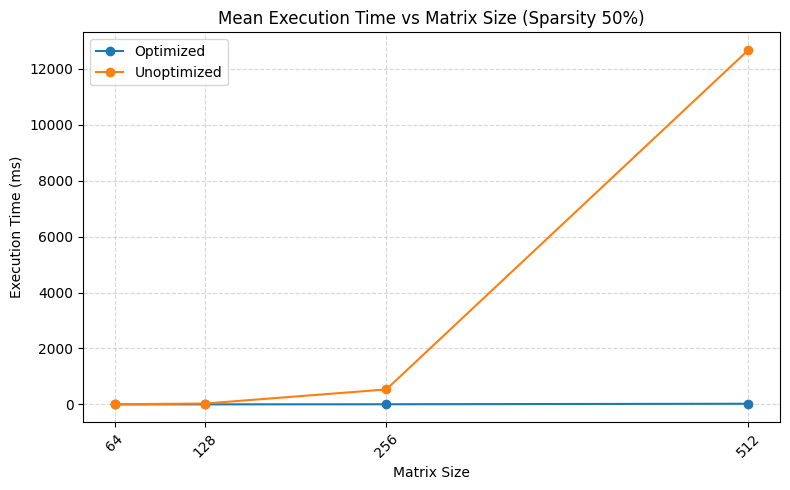

In [64]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Extract execution times
optimized_times = df_sparsity50[df_sparsity50['implementation'] == 'optimized']['execution_time_ms_mean'].tolist()
unoptimized_times = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) times:", optimized_times)
print("Unoptimized times:", unoptimized_times)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized', 'Unoptimized'],
    title='Mean Execution Time vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_mean_vs_size_sparsity50.png'
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) median times: [0.132, 0.502, 3.718, 22.069]
Unoptimized median times: [3.3285, 29.3505, 538.0225, 12768.953]
Plot saved to ./graphs\time_median_vs_size_sparsity50.png


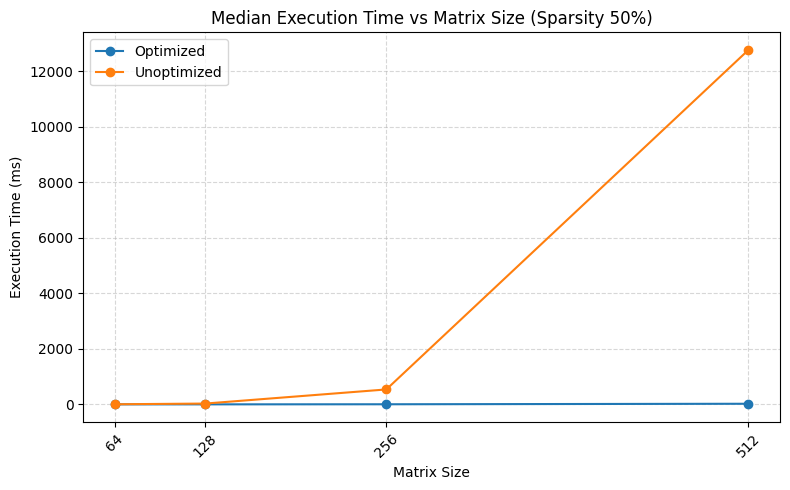

In [65]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Extract execution times using median
optimized_times = df_sparsity50[df_sparsity50['implementation'] == 'optimized']['execution_time_ms_median'].tolist()
unoptimized_times = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['execution_time_ms_median'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median times:", optimized_times)
print("Unoptimized median times:", unoptimized_times)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized', 'Unoptimized'],
    title='Median Execution Time vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_median_vs_size_sparsity50.png'
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) execution time std: [0.02829291234371055, 0.22025843406729695, 0.7898702003071981, 0.6510306846692796]
Unoptimized execution time std: [0.2935523614091511, 3.2238782648646445, 27.534683239708997, 802.4159149593461]
Plot saved to ./graphs\time_std_vs_size_sparsity50.png


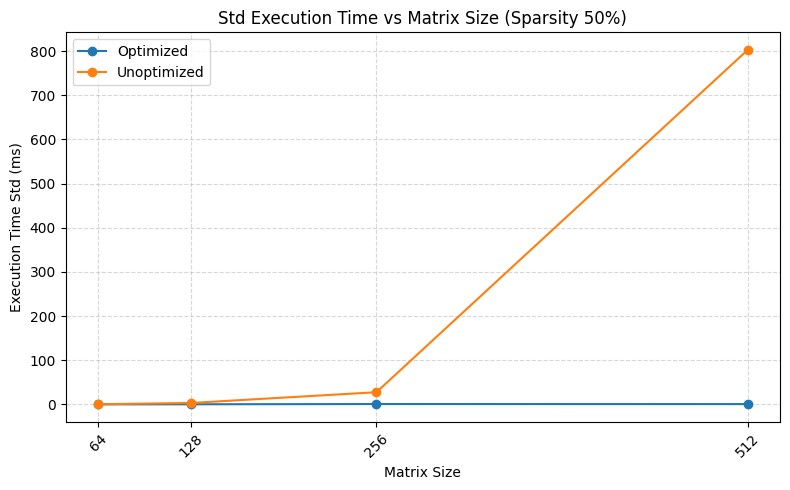

In [66]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Extract execution time standard deviations
optimized_std = df_sparsity50[df_sparsity50['implementation'] == 'optimized']['execution_time_ms_std'].tolist()
unoptimized_std = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['execution_time_ms_std'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) execution time std:", optimized_std)
print("Unoptimized execution time std:", unoptimized_std)

# Plot the standard deviations
plot_lines(
    x=sizes,
    y=[optimized_std, unoptimized_std],
    labels=['Optimized', 'Unoptimized'],
    title='Std Execution Time vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Execution Time Std (ms)',
    file_name='time_std_vs_size_sparsity50.png'
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) times: [0.1059, 0.496, 1.8501, 10.340571428571428]
Unoptimized times: [0.7455, 8.267100000000001, 133.9699, 3340.0673]
Plot saved to ./graphs\time_mean_vs_size_sparsity75.png


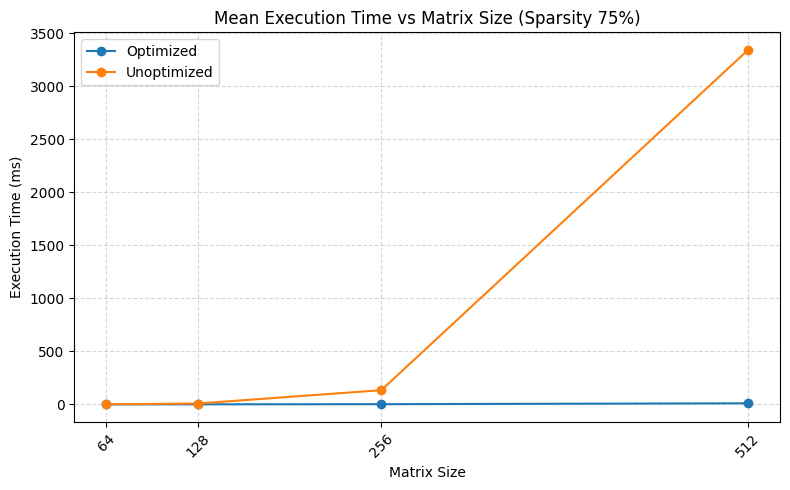

In [67]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Extract execution times for each implementation
optimized_times = df_sparsity75[df_sparsity75['implementation'] == 'optimized']['execution_time_ms_mean'].tolist()
unoptimized_times = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) times:", optimized_times)
print("Unoptimized times:", unoptimized_times)

# Plot
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized', 'Unoptimized'],
    title='Mean Execution Time vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_mean_vs_size_sparsity75.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) median times: [0.097, 0.469, 1.518, 9.825]
Unoptimized median times: [0.7525, 7.5245, 136.295, 3350.1315]
Plot saved to ./graphs\time_median_vs_size_sparsity75.png


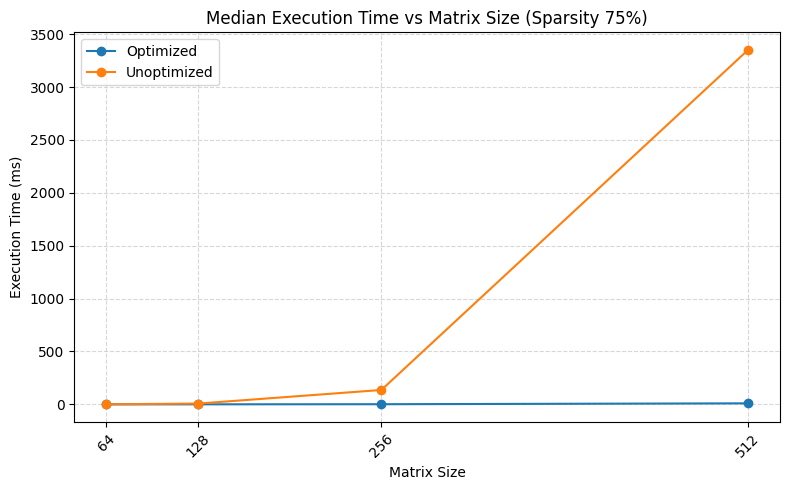

In [68]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Extract execution times (median)
optimized_times = df_sparsity75[df_sparsity75['implementation'] == 'optimized']['execution_time_ms_median'].tolist()
unoptimized_times = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['execution_time_ms_median'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median times:", optimized_times)
print("Unoptimized median times:", unoptimized_times)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized', 'Unoptimized'],
    title='Median Execution Time vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_median_vs_size_sparsity75.png'
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) execution time std: [0.032195410300917805, 0.06213605144269216, 0.6743474953200644, 1.6762498677248625]
Unoptimized execution time std: [0.053606073453584646, 1.6365721255790169, 12.604262642719984, 70.7216831735501]
Plot saved to ./graphs\time_std_vs_size_sparsity75.png


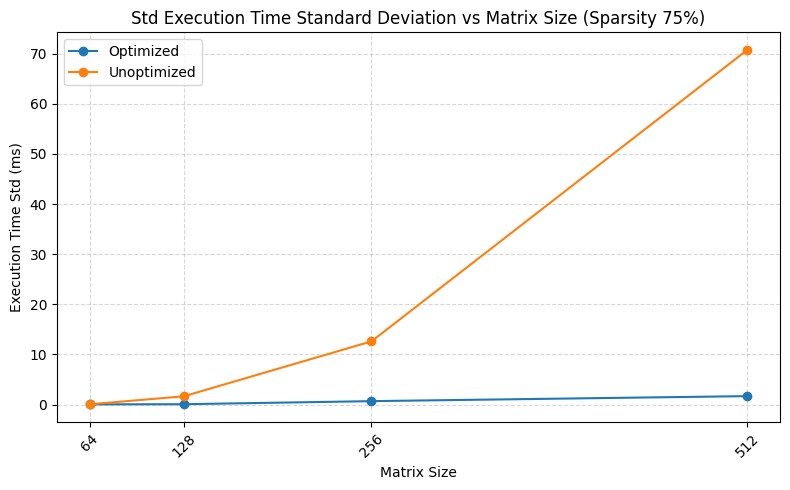

In [69]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Extract execution time standard deviations
optimized_std = df_sparsity75[df_sparsity75['implementation'] == 'optimized']['execution_time_ms_std'].tolist()
unoptimized_std = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['execution_time_ms_std'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) execution time std:", optimized_std)
print("Unoptimized execution time std:", unoptimized_std)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_std, unoptimized_std],
    labels=['Optimized', 'Unoptimized'],
    title='Std Execution Time Standard Deviation vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Execution Time Std (ms)',
    file_name='time_std_vs_size_sparsity75.png'
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) times: [0.040499999999999994, 0.327, 1.0039, 7.815666666666668]
Unoptimized times: [0.1484, 1.684, 24.1959, 312.2256]
Plot saved to ./graphs\time_mean_vs_size_sparsity90.png


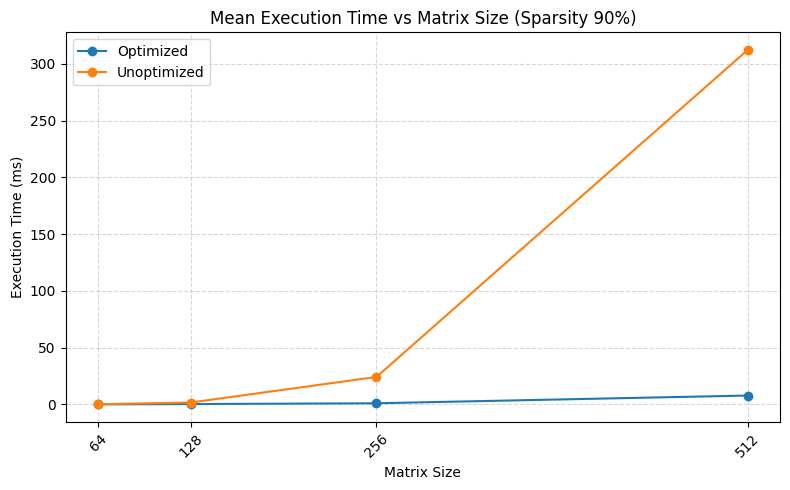

In [70]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Extract execution times for each implementation
optimized_times = df_sparsity90[df_sparsity90['implementation'] == 'optimized']['execution_time_ms_mean'].tolist()
unoptimized_times = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) times:", optimized_times)
print("Unoptimized times:", unoptimized_times)

# Plot
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized', 'Unoptimized'],
    title='Mean Execution Time vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_mean_vs_size_sparsity90.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) median times: [0.039, 0.3005, 0.9804999999999999, 6.016500000000001]
Unoptimized median times: [0.1495, 1.693, 24.509999999999998, 312.6405]
Plot saved to ./graphs\time_median_vs_size_sparsity90.png


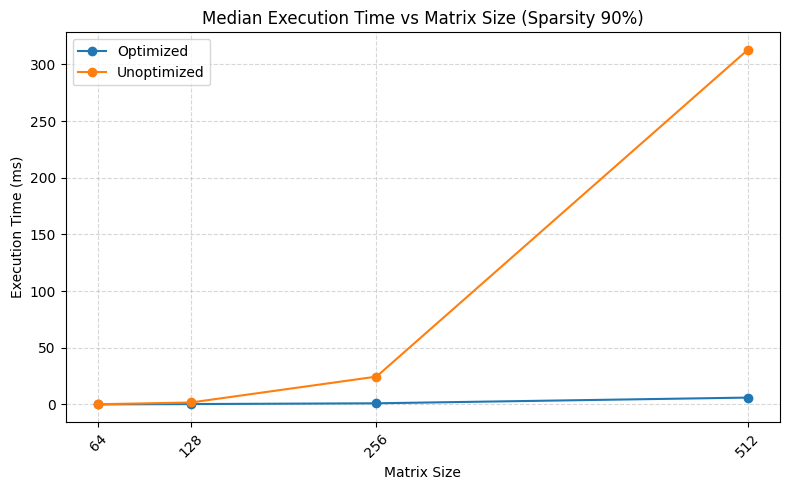

In [71]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Extract execution time median
optimized_times_median = df_sparsity90[df_sparsity90['implementation'] == 'optimized']['execution_time_ms_median'].tolist()
unoptimized_times_median = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['execution_time_ms_median'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median times:", optimized_times_median)
print("Unoptimized median times:", unoptimized_times_median)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times_median, unoptimized_times_median],
    labels=['Optimized', 'Unoptimized'],
    title='Median Execution Time vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_median_vs_size_sparsity90.png'
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) execution time std: [0.0044783429475148, 0.06678822251465198, 0.10737209445040488, 4.319208615784455]
Unoptimized execution time std: [0.015196490822993743, 0.15056781417908233, 4.41989417796902, 25.739103486070896]


Plot saved to ./graphs\time_std_vs_size_sparsity90.png


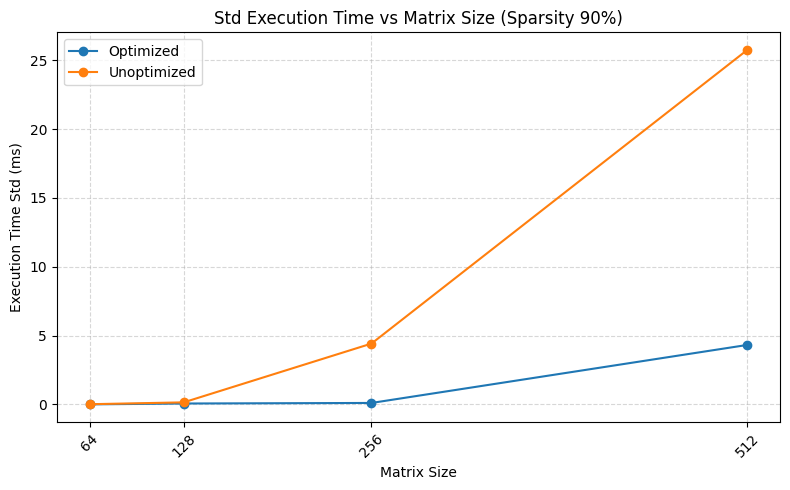

In [72]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Extract execution time std
optimized_std = df_sparsity90[df_sparsity90['implementation'] == 'optimized']['execution_time_ms_std'].tolist()
unoptimized_std = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['execution_time_ms_std'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) execution time std:", optimized_std)
print("Unoptimized execution time std:", unoptimized_std)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_std, unoptimized_std],
    labels=['Optimized', 'Unoptimized'],
    title='Std Execution Time vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Execution Time Std (ms)',
    file_name='time_std_vs_size_sparsity90.png'
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) times: [0.011, 0.10700000000000001, 0.5922, 3.2585714285714285]
Unoptimized times: [0.0538, 0.4747, 7.4323999999999995, 86.8078]
Plot saved to ./graphs\time_mean_vs_size_sparsity95.png


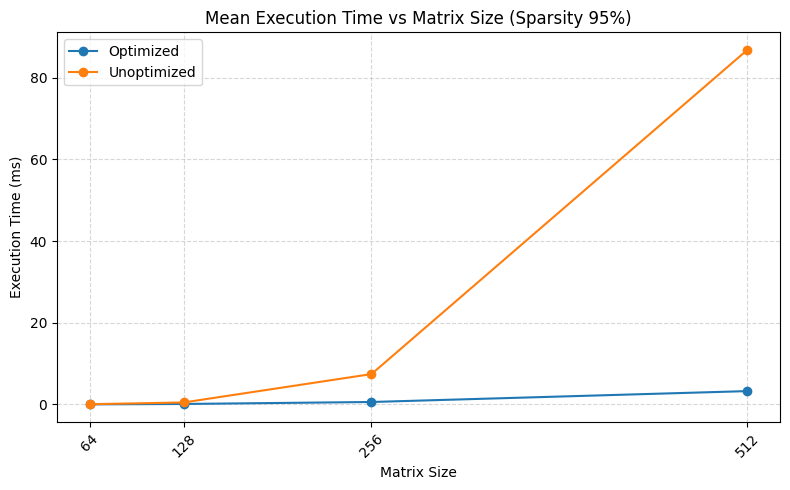

In [73]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Extract execution times
optimized_times = df_sparsity95[df_sparsity95['implementation'] == 'optimized']['execution_time_ms_mean'].tolist()
unoptimized_times = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) times:", optimized_times)
print("Unoptimized times:", unoptimized_times)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized', 'Unoptimized'],
    title='Mean Execution Time vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_mean_vs_size_sparsity95.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) median times: [0.011, 0.108, 0.556, 3.21]
Unoptimized median times: [0.052, 0.48550000000000004, 7.306, 89.993]
Plot saved to ./graphs\time_median_vs_size_sparsity95.png


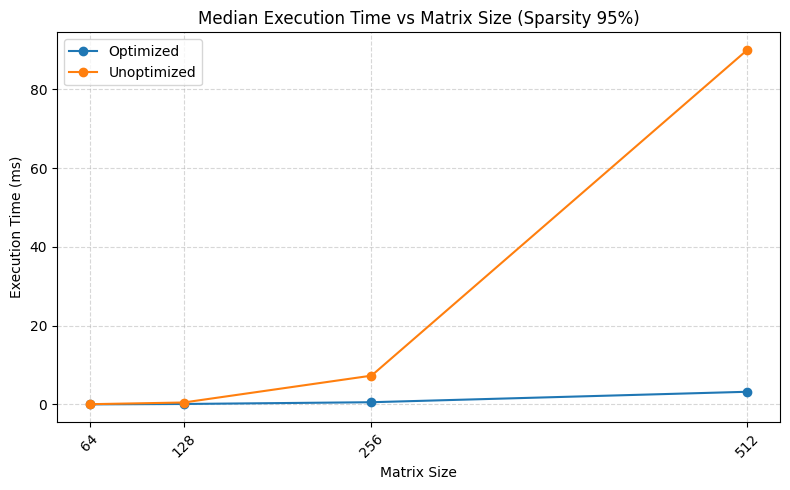

In [74]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Extract execution times (median)
optimized_times = df_sparsity95[df_sparsity95['implementation'] == 'optimized']['execution_time_ms_median'].tolist()
unoptimized_times = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['execution_time_ms_median'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median times:", optimized_times)
print("Unoptimized median times:", unoptimized_times)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_times, unoptimized_times],
    labels=['Optimized', 'Unoptimized'],
    title='Median Execution Time vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_median_vs_size_sparsity95.png'
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) execution time std: [0.0, 0.008393118874676114, 0.12581361876468966, 0.10661434728787232]
Unoptimized execution time std: [0.0035839146815241593, 0.07414108172936244, 1.062653199412782, 10.634533681465404]
Plot saved to ./graphs\time_std_vs_size_sparsity95.png


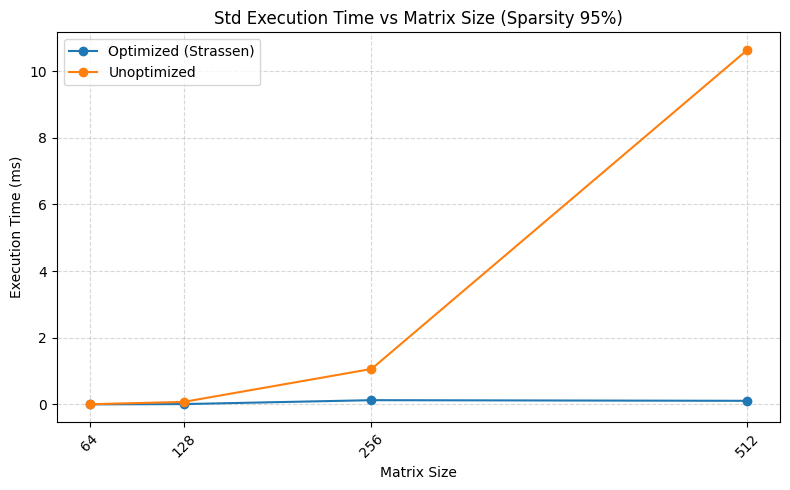

In [75]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Extract memory usage standard deviation
optimized_memory_std = df_sparsity95[df_sparsity95['implementation'] == 'optimized']['execution_time_ms_std'].tolist()
unoptimized_memory_std = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['execution_time_ms_std'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) execution time std:", optimized_memory_std)
print("Unoptimized execution time std:", unoptimized_memory_std)

# Plot the results
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized (Strassen)', 'Unoptimized'],
    title='Std Execution Time vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='time_std_vs_size_sparsity95.png',
)


Matrix sizes: [64, 128, 256, 512]
Unoptimized execution times (ms): [18.1682, 129.4442, 3104.8367000000003, 48377.553700000004]
Theoretical naive times (ms): [0.262144, 2.097152, 16.777216, 134.217728]
Plot saved to ./graphs\comparison_unoptimized_time_vs_theoretical_complexity.png


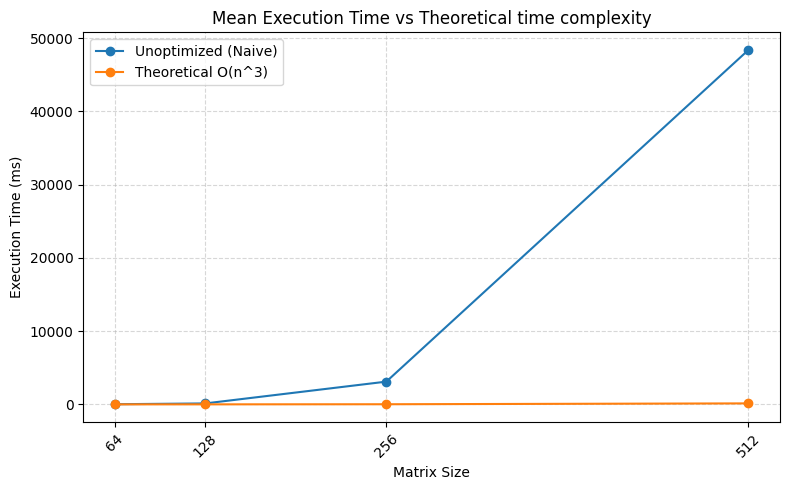

In [76]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Extract unoptimized execution times
unoptimized_times = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['execution_time_ms_mean'].tolist()

# Compute theoretical naive time complexity: O(n^3)
# Scale factor chosen to roughly match observed unoptimized execution times
scale_factor = 1e-6
theoretical_naive_times = [scale_factor * (n ** 3) for n in sizes]

# Print results
print("Matrix sizes:", sizes)
print("Unoptimized execution times (ms):", unoptimized_times)
print("Theoretical naive times (ms):", theoretical_naive_times)

# Plot the execution times
plot_lines(
    x=sizes,
    y=[unoptimized_times, theoretical_naive_times],
    labels=['Unoptimized (Naive)', 'Theoretical O(n^3)'],
    title='Mean Execution Time vs Theoretical time complexity',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='comparison_unoptimized_time_vs_theoretical_complexity.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized execution times (ms): [0.2565, 1.4544000000000001, 10.9113, 83.2269]
Theoretical Strassen times (ms): [np.float64(117.64900000000003), np.float64(823.5430000000002), np.float64(5764.801000000002), np.float64(40353.60700000002)]
Plot saved to ./graphs\comparison_optimized_time_vs_theoretical_complexity.png


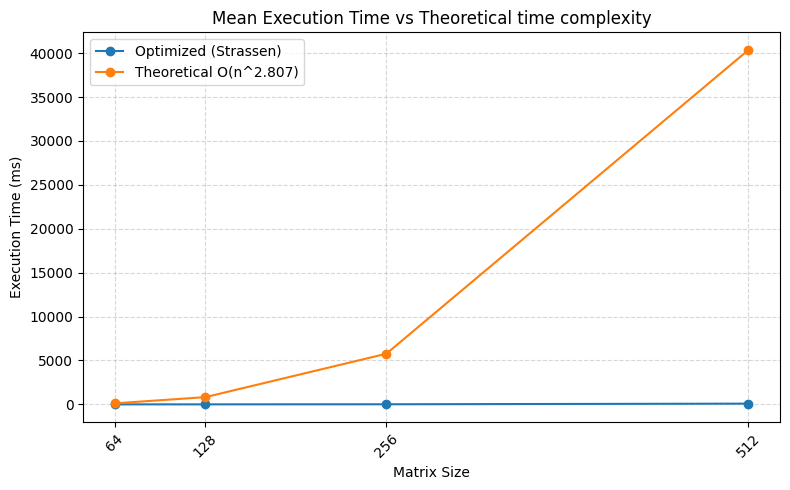

In [77]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Extract optimized execution times
optimized_times = df_sparsity0[df_sparsity0['implementation'] == 'optimized']['execution_time_ms_mean'].tolist()

# Compute theoretical Strassen time complexity: O(n^log2(7))
# Scale factor chosen to roughly match observed optimized execution times
scale_factor = 1e-3
theoretical_times = [scale_factor * (n ** np.log2(7)) for n in sizes]

# Print results
print("Matrix sizes:", sizes)
print("Optimized execution times (ms):", optimized_times)
print("Theoretical Strassen times (ms):", theoretical_times)

# Plot the execution times
plot_lines(
    x=sizes,
    y=[optimized_times, theoretical_times],
    labels=['Optimized (Strassen)', 'Theoretical O(n^2.807)'],
    title='Mean Execution Time vs Theoretical time complexity',
    xlabel='Matrix Size',
    ylabel='Execution Time (ms)',
    file_name='comparison_optimized_time_vs_theoretical_complexity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.2565, 0.14140000000000003, 0.1059, 0.040499999999999994, 0.011]
Matrix size 128: [1.4544000000000001, 0.616, 0.496, 0.327, 0.10700000000000001]
Matrix size 256: [10.9113, 4.0504, 1.8501, 1.0039, 0.5922]
Matrix size 512: [83.2269, 22.19242857142857, 10.340571428571428, 7.815666666666668, 3.2585714285714285]
Plot saved to ./graphs\time_mean_optimized_vs_sparsity.png


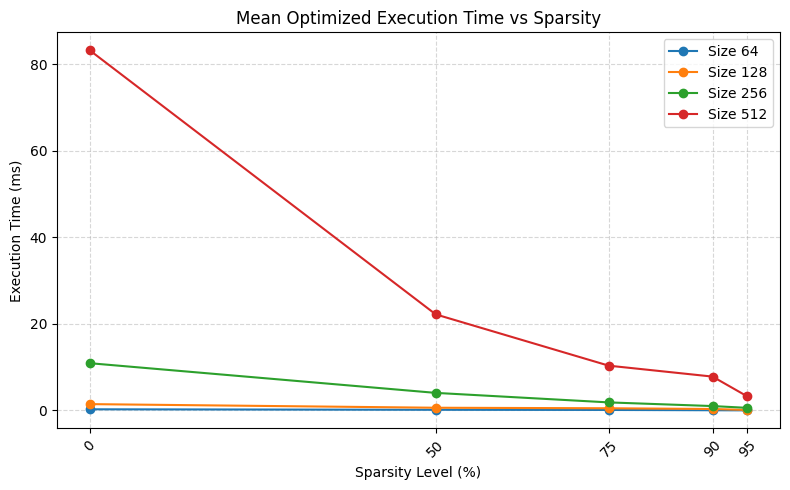

In [78]:
# Filter only optimized implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_opt['matrix_size'].unique().tolist()

# Prepare data for each matrix size
y_values = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_mean'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Mean Optimized Execution Time vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time (ms)',
    file_name='time_mean_optimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.2425, 0.132, 0.097, 0.039, 0.011]
Matrix size 128: [1.4344999999999999, 0.502, 0.469, 0.3005, 0.108]
Matrix size 256: [10.2625, 3.718, 1.518, 0.9804999999999999, 0.556]
Matrix size 512: [76.676, 22.069, 9.825, 6.016500000000001, 3.21]
Plot saved to ./graphs\time_median_optimized_vs_sparsity.png


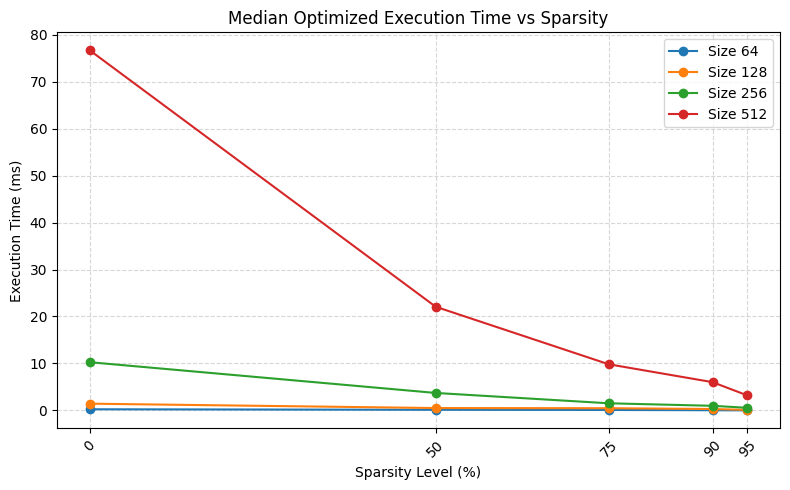

In [79]:
# Filter only optimized implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all sparsity levels
sparsities = df_opt['sparse_level_percent'].unique().tolist()

# Get all matrix sizes
matrix_sizes = df_opt['matrix_size'].unique().tolist()

# Prepare data for each matrix size using median execution time
y_values = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_median'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Median Optimized Execution Time vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time (ms)',
    file_name='time_median_optimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64 (std): [0.05209233255586767, 0.02829291234371055, 0.032195410300917805, 0.0044783429475148, 0.0]
Matrix size 128 (std): [0.07005109246511115, 0.22025843406729695, 0.06213605144269216, 0.06678822251465198, 0.008393118874676114]
Matrix size 256 (std): [2.3089053226342755, 0.7898702003071981, 0.6743474953200644, 0.10737209445040488, 0.12581361876468966]
Matrix size 512 (std): [15.992748519598221, 0.6510306846692796, 1.6762498677248625, 4.319208615784455, 0.10661434728787232]
Plot saved to ./graphs\time_std_optimized_vs_sparsity.png


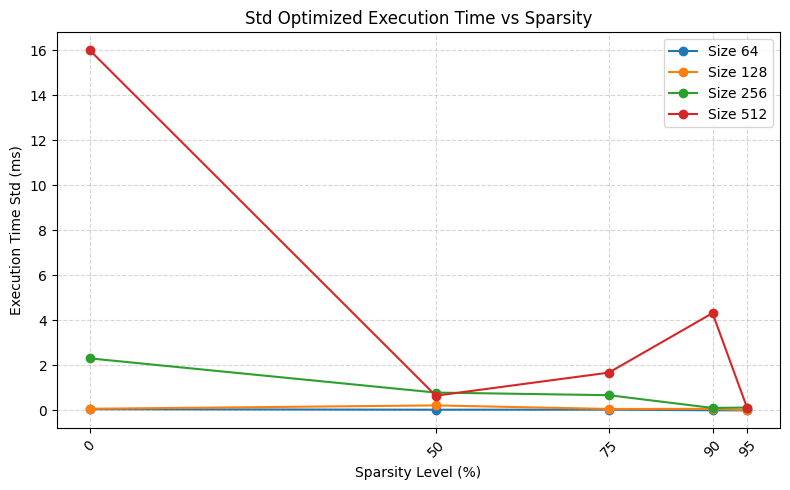

In [80]:
# Filter only optimized implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_opt['matrix_size'].unique().tolist()
sparsities = df_opt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size (using standard deviation)
y_values = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_std'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size} (std): {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Std Optimized Execution Time vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time Std (ms)',
    file_name='time_std_optimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [18.1682, 3.2911, 0.7455, 0.1484, 0.0538]
Matrix size 128: [129.4442, 30.3522, 8.267100000000001, 1.684, 0.4747]
Matrix size 256: [3104.8367000000003, 534.205, 133.9699, 24.1959, 7.4323999999999995]
Matrix size 512: [48377.553700000004, 12671.4394, 3340.0673, 312.2256, 86.8078]
Plot saved to ./graphs\time_mean_unoptimized_vs_sparsity.png


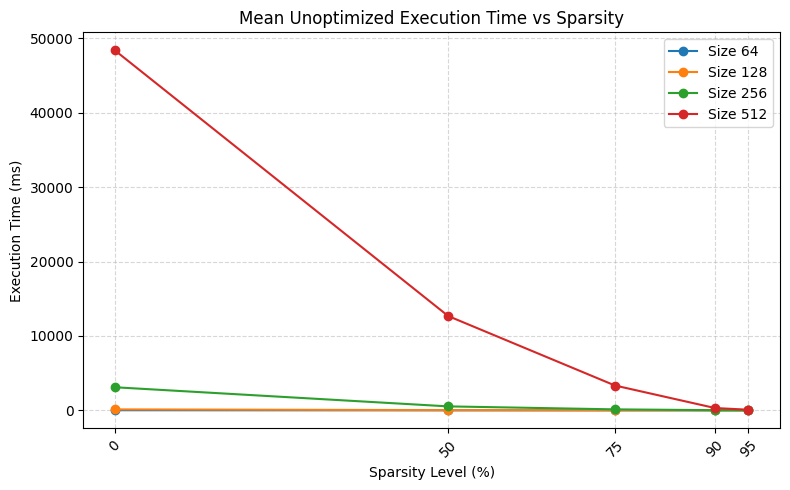

In [81]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_mean'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Mean Unoptimized Execution Time vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time (ms)',
    file_name='time_mean_unoptimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [14.4515, 3.3285, 0.7525, 0.1495, 0.052]
Matrix size 128: [127.982, 29.3505, 7.5245, 1.693, 0.48550000000000004]
Matrix size 256: [3083.8, 538.0225, 136.295, 24.509999999999998, 7.306]
Matrix size 512: [51343.1805, 12768.953, 3350.1315, 312.6405, 89.993]
Plot saved to ./graphs\time_median_unoptimized_vs_sparsity.png


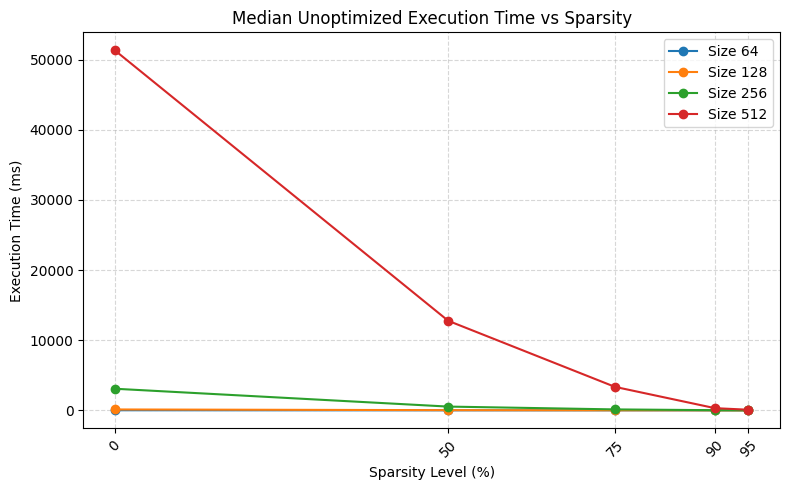

In [82]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size using median execution time
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_median'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Median Unoptimized Execution Time vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time (ms)',
    file_name='time_median_unoptimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64 std dev: [7.009029617413368, 0.2935523614091511, 0.053606073453584646, 0.015196490822993743, 0.0035839146815241593]
Matrix size 128 std dev: [12.817670500783935, 3.2238782648646445, 1.6365721255790169, 0.15056781417908233, 0.07414108172936244]
Matrix size 256 std dev: [143.5510738773641, 27.534683239708997, 12.604262642719984, 4.41989417796902, 1.062653199412782]
Matrix size 512 std dev: [7303.541862180508, 802.4159149593461, 70.7216831735501, 25.739103486070896, 10.634533681465404]
Plot saved to ./graphs\time_std_unoptimized_vs_sparsity.png


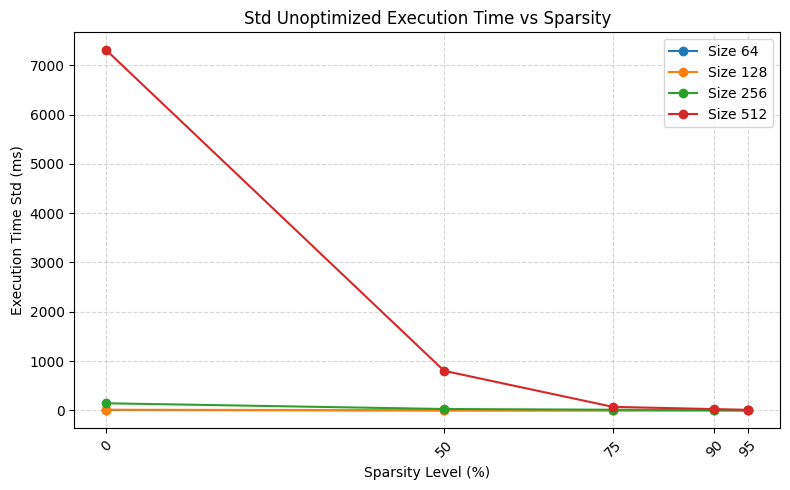

In [83]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size using std instead of mean
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['execution_time_ms_std'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size} std dev:", vals)

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Std Unoptimized Execution Time vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Execution Time Std (ms)',
    file_name='time_std_unoptimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.1984, 0.18839999999999998, 0.3987, 0.15899999999999997, 0.0]
Matrix size 128: [1.1326, 0.922, 0.9601000000000001, 0.8733000000000001, 0.2817]
Matrix size 256: [4.3893, 4.316599999999999, 4.2919, 3.7159, 1.7955999999999999]
Matrix size 512: [24.4996, 24.829285714285714, 24.880714285714284, 18.552333333333333, 14.055714285714286]
Plot saved to ./graphs\memory_mean_optimized_vs_sparsity.png


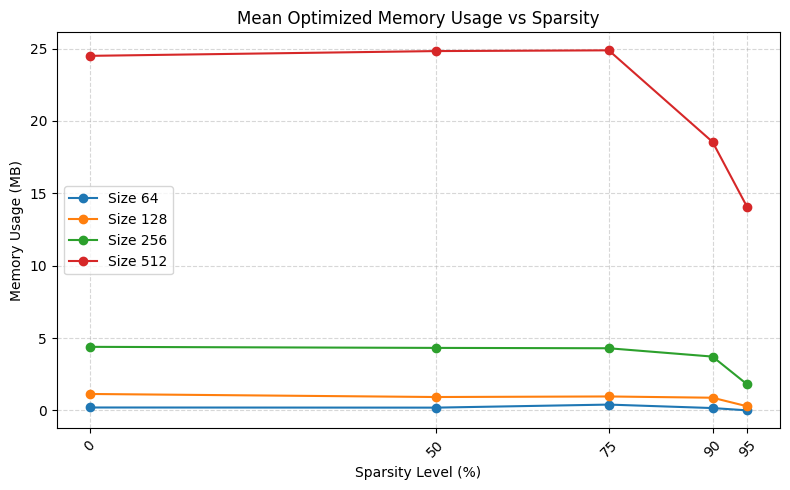

In [84]:
# Filter only optimized implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_opt['matrix_size'].unique().tolist()
sparsities = df_opt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size
y_values = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values.append(subset['memory_usage_mb_mean'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Mean Optimized Memory Usage vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage (MB)',
    file_name='memory_mean_optimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.0, 0.0285, 0.408, 0.0, 0.0]
Matrix size 128: [1.118, 0.9059999999999999, 0.897, 0.81, 0.0]
Matrix size 256: [4.335, 4.383, 4.4275, 3.6125, 1.9955]
Matrix size 512: [24.102, 24.881, 24.998, 21.473999999999997, 14.125]
Plot saved to ./graphs\memory_median_optimized_vs_sparsity.png


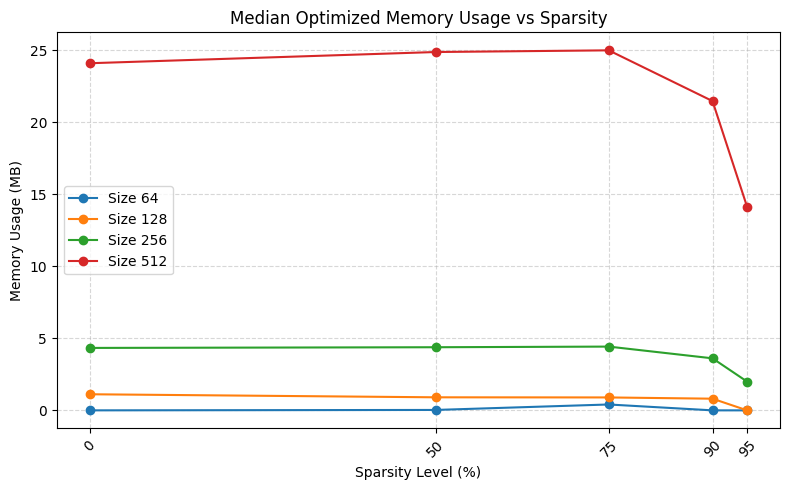

In [85]:
# Filter only optimized implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_opt['matrix_size'].unique().tolist()
sparsities = df_opt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size using median
y_values = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values.append(subset['memory_usage_mb_median'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Median Optimized Memory Usage vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage (MB)',
    file_name='memory_median_optimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.25677149374492486, 0.23337342512710302, 0.035333490565687874, 0.20574957810136302, 0.0]
Matrix size 128: [0.17795018029399876, 0.340625242099812, 0.32030660658535004, 0.23930689268988664, 0.37441986236487684]
Matrix size 256: [0.1886254666439999, 0.2685869195127219, 0.36311597473962937, 0.351620202301669, 0.393882441570804]
Matrix size 512: [0.516744338247757, 0.40576911098378526, 0.34478433562915695, 7.228642214597888, 0.16250406588320018]
Plot saved to ./graphs\memory_std_optimized_vs_sparsity.png


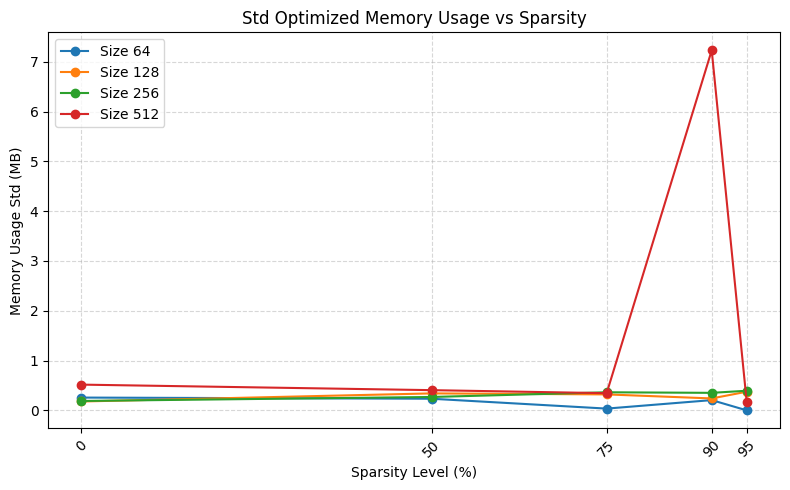

In [86]:
# Filter only optimized implementation
df_opt = agg_df[agg_df['implementation'] == 'optimized']

# Sort by matrix size and sparsity for consistent plotting
df_opt = df_opt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_opt['matrix_size'].unique().tolist()
sparsities = df_opt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size (using std instead of mean)
y_values_std = []
for size in matrix_sizes:
    subset = df_opt[df_opt['matrix_size'] == size]
    y_values_std.append(subset['memory_usage_mb_std'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values_std):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values_std,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Std Optimized Memory Usage vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_std_optimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.3479, 0.1834, 0.1025, 0.05500000000000001, 0.037]
Matrix size 128: [1.2571999999999999, 0.6406000000000001, 0.34809999999999997, 0.1922, 0.13090000000000002]
Matrix size 256: [4.013, 2.3872, 1.4653, 0.6975, 0.5142]
Matrix size 512: [15.168600000000001, 9.4692, 4.7548, 3.1424, 1.9702000000000002]
Plot saved to ./graphs\memory_mean_unoptimized_vs_sparsity.png


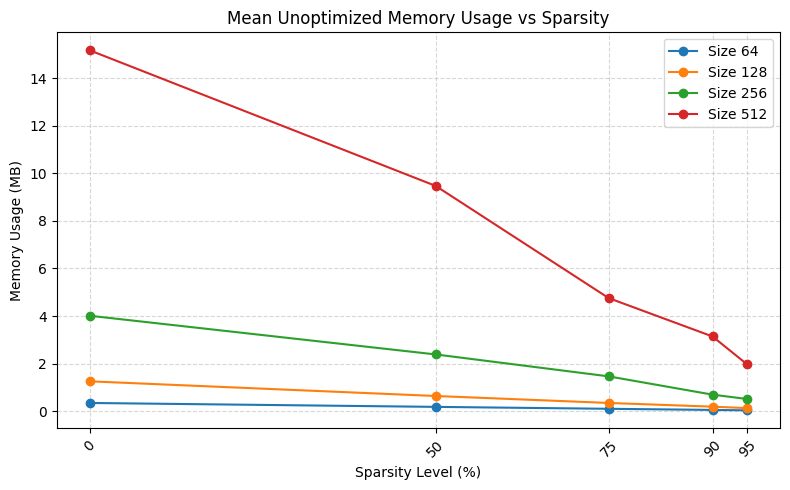

In [87]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['memory_usage_mb_mean'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Mean Unoptimized Memory Usage vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage (MB)',
    file_name='memory_mean_unoptimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.304, 0.183, 0.102, 0.055, 0.037]
Matrix size 128: [1.257, 0.64, 0.3475, 0.1925, 0.13]
Matrix size 256: [4.013, 2.3855, 1.461, 0.696, 0.518]
Matrix size 512: [15.0405, 9.0665, 4.758, 2.945, 1.958]
Plot saved to ./graphs\memory_median_unoptimized_vs_sparsity.png


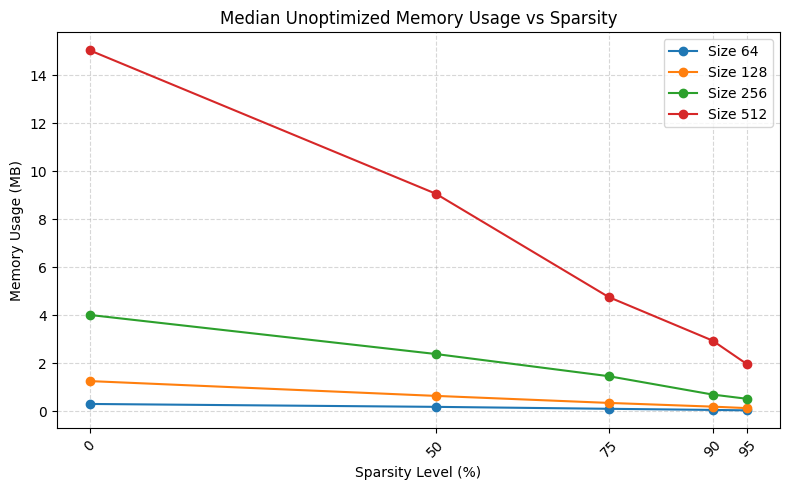

In [88]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size using median memory usage
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['memory_usage_mb_median'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Median Unoptimized Memory Usage vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage (MB)',
    file_name='memory_median_unoptimized_vs_sparsity.png',
)


Sparsity levels: [0, 50, 75, 90, 95]
Matrix size 64: [0.0599545197999654, 0.0016465452046971365, 0.0010801234497346457, 0.0, 0.0]
Matrix size 128: [0.0060332412515993255, 0.00350238014308363, 0.0033813212407775295, 0.0030110906108363135, 0.0023781411975649365]
Matrix size 256: [0.0, 0.030687673964204857, 0.029751003717895273, 0.010658851303546305, 0.010580905233275458]
Matrix size 512: [0.70999517995234, 1.1489588330310188, 0.14895994987467828, 0.45233424220002033, 0.023550418727110157]
Plot saved to ./graphs\memory_std_unoptimized_vs_sparsity.png


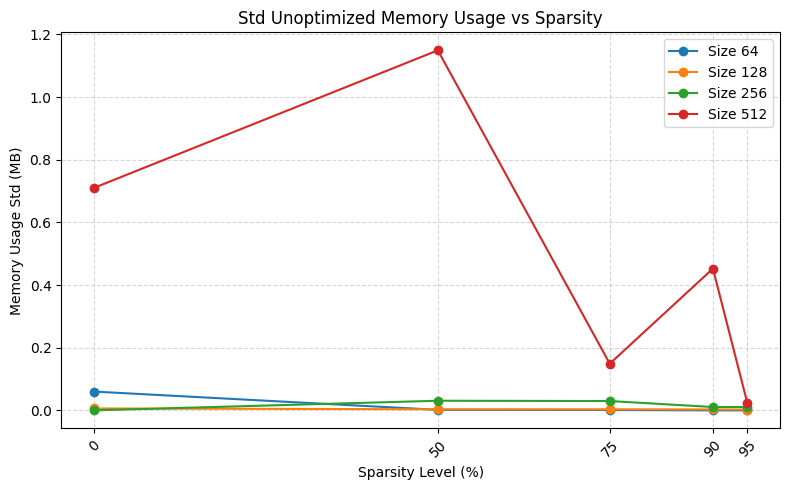

In [89]:
# Filter only unoptimized implementation
df_unopt = agg_df[agg_df['implementation'] == 'unoptimized']

# Sort by matrix size and sparsity for consistent plotting
df_unopt = df_unopt.sort_values(['matrix_size', 'sparse_level_percent'])

# Get all matrix sizes and sparsity levels
matrix_sizes = df_unopt['matrix_size'].unique().tolist()
sparsities = df_unopt['sparse_level_percent'].unique().tolist()

# Prepare data for each matrix size (using std instead of mean)
y_values = []
for size in matrix_sizes:
    subset = df_unopt[df_unopt['matrix_size'] == size]
    y_values.append(subset['memory_usage_mb_std'].tolist())

# Print summary
print("Sparsity levels:", sparsities)
for size, vals in zip(matrix_sizes, y_values):
    print(f"Matrix size {size}: {vals}")

# Plot the lines
plot_lines(
    x=sparsities,
    y=y_values,
    labels=[f"Size {s}" for s in matrix_sizes],
    title='Std Unoptimized Memory Usage vs Sparsity',
    xlabel='Sparsity Level (%)',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_std_unoptimized_vs_sparsity.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory usage (MB): [0.1984, 1.1326, 4.3893, 24.4996]
Unoptimized memory usage (MB): [0.3479, 1.2571999999999999, 4.013, 15.168600000000001]
Plot saved to ./graphs\memory_mean_vs_size_sparsity0.png


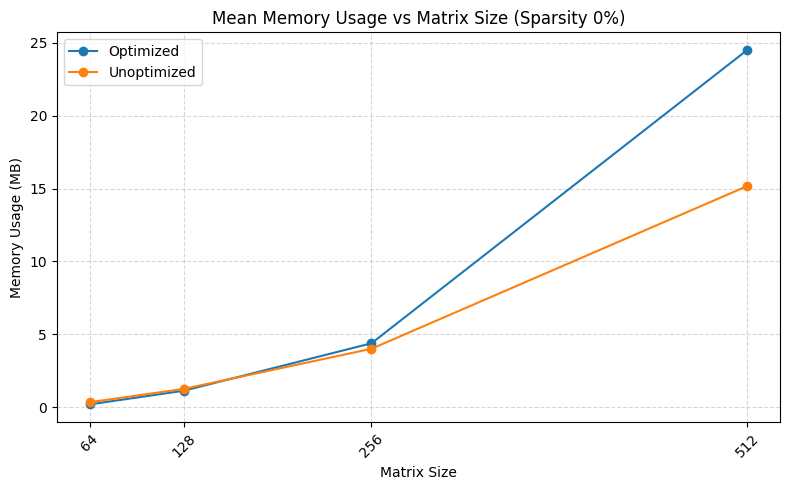

In [90]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract memory usage
optimized_memory = df_sparsity0[df_sparsity0['implementation'] == 'optimized']['memory_usage_mb_mean'].tolist()
unoptimized_memory = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage (MB):", optimized_memory)
print("Unoptimized memory usage (MB):", unoptimized_memory)

# Plot the memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory, unoptimized_memory],
    labels=['Optimized', 'Unoptimized'],
    title='Mean Memory Usage vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_mean_vs_size_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) median memory usage (MB): [0.0, 1.118, 4.335, 24.102]
Unoptimized median memory usage (MB): [0.304, 1.257, 4.013, 15.0405]
Plot saved to ./graphs\memory_median_vs_size_sparsity0.png


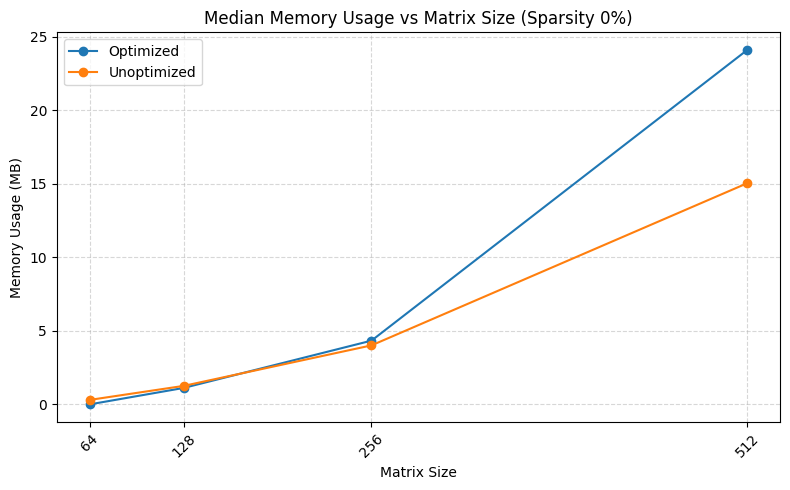

In [91]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract median memory usage
optimized_memory_median = df_sparsity0[df_sparsity0['implementation'] == 'optimized']['memory_usage_mb_median'].tolist()
unoptimized_memory_median = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['memory_usage_mb_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median memory usage (MB):", optimized_memory_median)
print("Unoptimized median memory usage (MB):", unoptimized_memory_median)

# Plot the median memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory_median, unoptimized_memory_median],
    labels=['Optimized', 'Unoptimized'],
    title='Median Memory Usage vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_median_vs_size_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory usage std (MB): [0.25677149374492486, 0.17795018029399876, 0.1886254666439999, 0.516744338247757]
Unoptimized memory usage std (MB): [0.0599545197999654, 0.0060332412515993255, 0.0, 0.70999517995234]
Plot saved to ./graphs\memory_std_vs_size_sparsity0.png


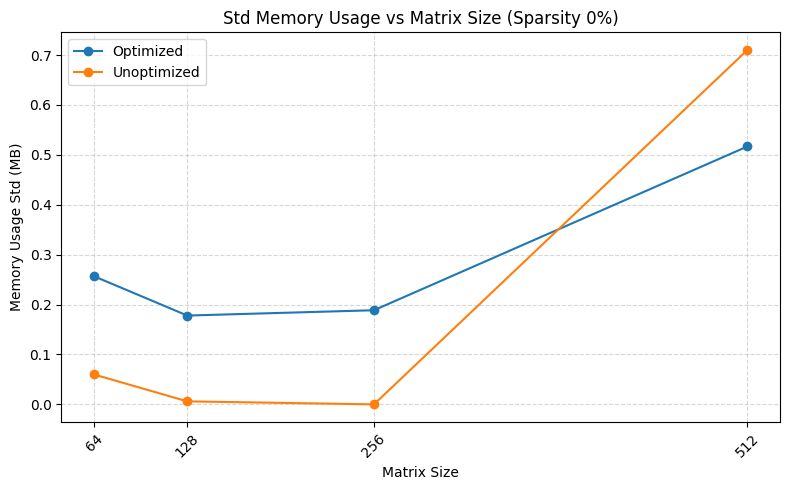

In [92]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size to ensure correct order
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract standard deviation of memory usage
optimized_memory_std = df_sparsity0[df_sparsity0['implementation'] == 'optimized']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage std (MB):", optimized_memory_std)
print("Unoptimized memory usage std (MB):", unoptimized_memory_std)

# Plot the standard deviation of memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized', 'Unoptimized'],
    title='Std Memory Usage vs Matrix Size (Sparsity 0%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_std_vs_size_sparsity0.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory usage: [0.18839999999999998, 0.922, 4.316599999999999, 24.829285714285714]
Unoptimized memory usage: [0.1834, 0.6406000000000001, 2.3872, 9.4692]
Plot saved to ./graphs\memory_mean_vs_size_sparsity50.png


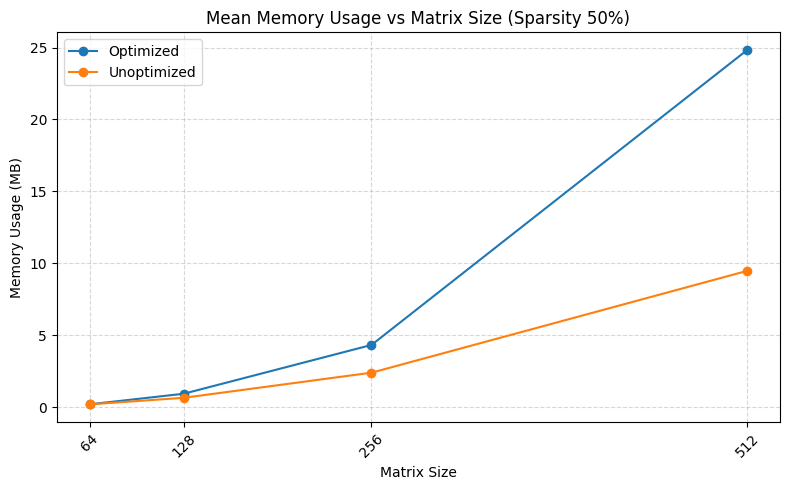

In [93]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Extract memory usage
optimized_memory = df_sparsity50[df_sparsity50['implementation'] == 'optimized']['memory_usage_mb_mean'].tolist()
unoptimized_memory = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage:", optimized_memory)
print("Unoptimized memory usage:", unoptimized_memory)

# Plot
plot_lines(
    x=sizes,
    y=[optimized_memory, unoptimized_memory],
    labels=['Optimized', 'Unoptimized'],
    title='Mean Memory Usage vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_mean_vs_size_sparsity50.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory usage (MB, median): [0.0285, 0.9059999999999999, 4.383, 24.881]
Unoptimized memory usage (MB, median): [0.183, 0.64, 2.3855, 9.0665]
Plot saved to ./graphs\memory_median_vs_size_sparsity50.png


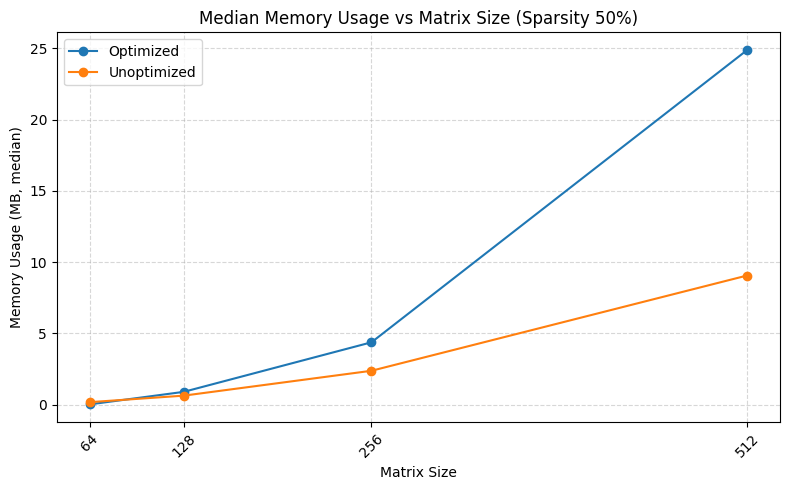

In [94]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract memory usage (median)
optimized_memory_median = df_sparsity50[df_sparsity50['implementation'] == 'optimized']['memory_usage_mb_median'].tolist()
unoptimized_memory_median = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['memory_usage_mb_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage (MB, median):", optimized_memory_median)
print("Unoptimized memory usage (MB, median):", unoptimized_memory_median)

# Plot the memory usage (median)
plot_lines(
    x=sizes,
    y=[optimized_memory_median, unoptimized_memory_median],
    labels=['Optimized', 'Unoptimized'],
    title='Median Memory Usage vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB, median)',
    file_name='memory_median_vs_size_sparsity50.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory std (MB): [0.23337342512710302, 0.340625242099812, 0.2685869195127219, 0.40576911098378526]
Unoptimized memory std (MB): [0.0016465452046971365, 0.00350238014308363, 0.030687673964204857, 1.1489588330310188]


Plot saved to ./graphs\memory_std_vs_size_sparsity50.png


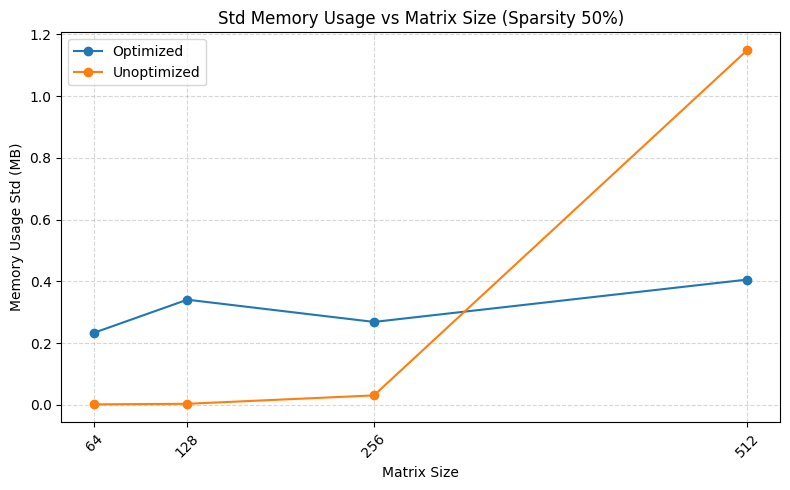

In [95]:
# Filter for sparsity 50
df_sparsity50 = agg_df[agg_df['sparse_level_percent'] == 50]

# Sort by matrix size to ensure correct order
df_sparsity50 = df_sparsity50.sort_values('matrix_size')

# Extract memory usage standard deviation
optimized_memory_std = df_sparsity50[df_sparsity50['implementation'] == 'optimized']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity50[df_sparsity50['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity50['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory std (MB):", optimized_memory_std)
print("Unoptimized memory std (MB):", unoptimized_memory_std)

# Plot the memory usage std
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized', 'Unoptimized'],
    title='Std Memory Usage vs Matrix Size (Sparsity 50%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_std_vs_size_sparsity50.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory usage: [0.3987, 0.9601000000000001, 4.2919, 24.880714285714284]
Unoptimized memory usage: [0.1025, 0.34809999999999997, 1.4653, 4.7548]
Plot saved to ./graphs\memory_mean_vs_size_sparsity75.png


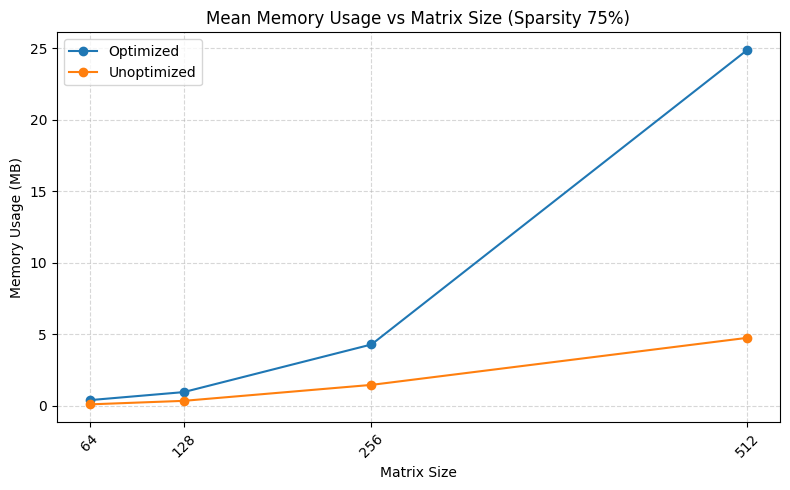

In [96]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract x-axis (matrix sizes)
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Extract memory usage
optimized_memory = df_sparsity75[df_sparsity75['implementation'] == 'optimized']['memory_usage_mb_mean'].tolist()
unoptimized_memory = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage:", optimized_memory)
print("Unoptimized memory usage:", unoptimized_memory)

# Plot memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory, unoptimized_memory],
    labels=['Optimized', 'Unoptimized'],
    title='Mean Memory Usage vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_mean_vs_size_sparsity75.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) median memory usage (MB): [0.408, 0.897, 4.4275, 24.998]
Unoptimized median memory usage (MB): [0.102, 0.3475, 1.461, 4.758]
Plot saved to ./graphs\memory_median_vs_size_sparsity75.png


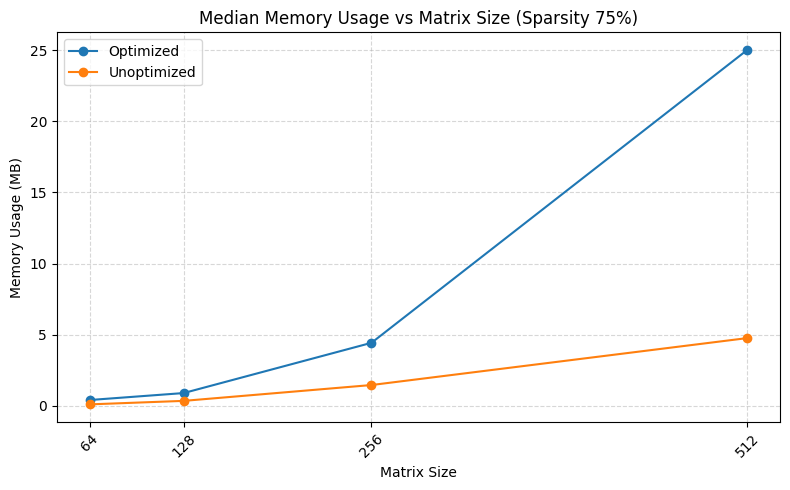

In [97]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract median memory usage
optimized_memory_median = df_sparsity75[df_sparsity75['implementation'] == 'optimized']['memory_usage_mb_median'].tolist()
unoptimized_memory_median = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['memory_usage_mb_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median memory usage (MB):", optimized_memory_median)
print("Unoptimized median memory usage (MB):", unoptimized_memory_median)

# Plot the median memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory_median, unoptimized_memory_median],
    labels=['Optimized', 'Unoptimized'],
    title='Median Memory Usage vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_median_vs_size_sparsity75.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory usage std (MB): [0.035333490565687874, 0.32030660658535004, 0.36311597473962937, 0.34478433562915695]
Unoptimized memory usage std (MB): [0.0010801234497346457, 0.0033813212407775295, 0.029751003717895273, 0.14895994987467828]


Plot saved to ./graphs\memory_std_vs_size_sparsity75.png


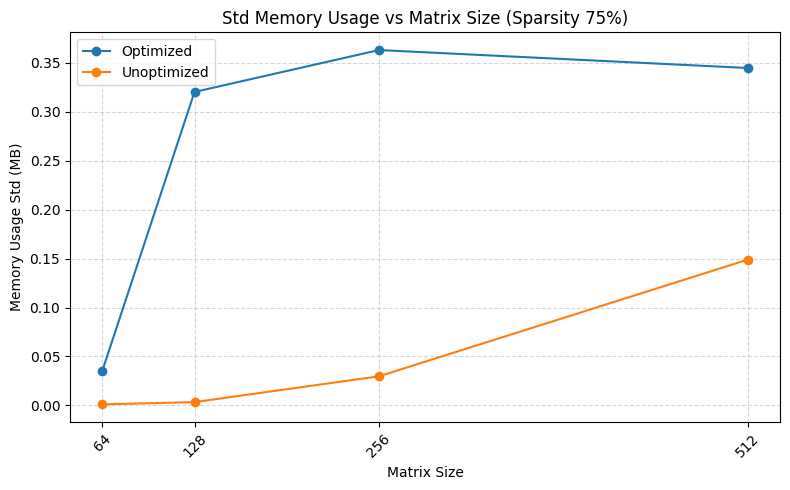

In [98]:
# Filter for sparsity 75
df_sparsity75 = agg_df[agg_df['sparse_level_percent'] == 75]

# Sort by matrix size to ensure correct order
df_sparsity75 = df_sparsity75.sort_values('matrix_size')

# Extract memory usage standard deviation
optimized_memory_std = df_sparsity75[df_sparsity75['implementation'] == 'optimized']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity75[df_sparsity75['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity75['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage std (MB):", optimized_memory_std)
print("Unoptimized memory usage std (MB):", unoptimized_memory_std)

# Plot the memory usage standard deviation
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized', 'Unoptimized'],
    title='Std Memory Usage vs Matrix Size (Sparsity 75%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_std_vs_size_sparsity75.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory usage: [0.15899999999999997, 0.8733000000000001, 3.7159, 18.552333333333333]
Unoptimized memory usage: [0.05500000000000001, 0.1922, 0.6975, 3.1424]
Plot saved to ./graphs\memory_mean_vs_size_sparsity90.png


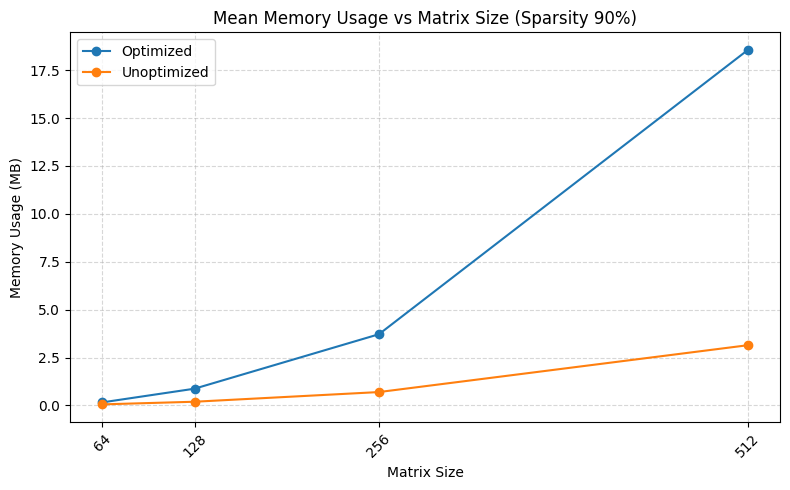

In [99]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract memory usage
optimized_memory = df_sparsity90[df_sparsity90['implementation'] == 'optimized']['memory_usage_mb_mean'].tolist()
unoptimized_memory = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Extract matrix sizes
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage:", optimized_memory)
print("Unoptimized memory usage:", unoptimized_memory)

# Plot memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory, unoptimized_memory],
    labels=['Optimized', 'Unoptimized'],
    title='Mean Memory Usage vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_mean_vs_size_sparsity90.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) median memory usage (MB): [0.0, 0.81, 3.6125, 21.473999999999997]
Unoptimized median memory usage (MB): [0.055, 0.1925, 0.696, 2.945]


Plot saved to ./graphs\memory_median_vs_size_sparsity90.png


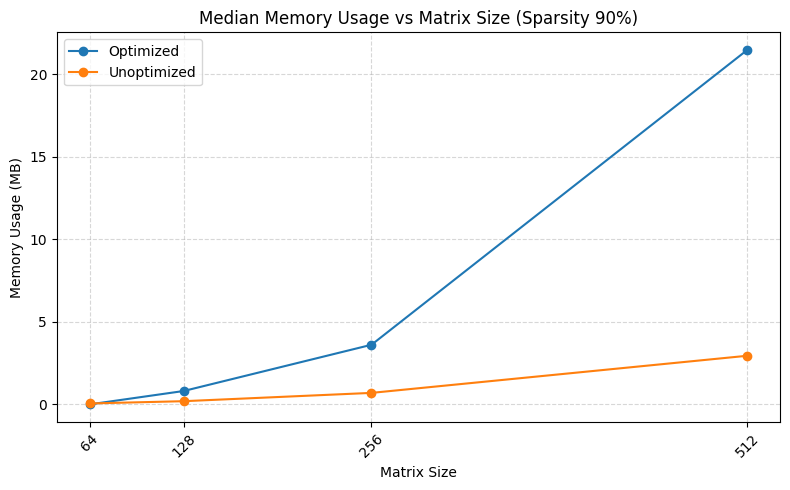

In [100]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract median memory usage
optimized_memory_median = df_sparsity90[df_sparsity90['implementation'] == 'optimized']['memory_usage_mb_median'].tolist()
unoptimized_memory_median = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['memory_usage_mb_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median memory usage (MB):", optimized_memory_median)
print("Unoptimized median memory usage (MB):", unoptimized_memory_median)

# Plot the memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory_median, unoptimized_memory_median],
    labels=['Optimized', 'Unoptimized'],
    title='Median Memory Usage vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_median_vs_size_sparsity90.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory usage std (MB): [0.20574957810136302, 0.23930689268988664, 0.351620202301669, 7.228642214597888]
Unoptimized memory usage std (MB): [0.0, 0.0030110906108363135, 0.010658851303546305, 0.45233424220002033]
Plot saved to ./graphs\memory_std_vs_size_sparsity90.png


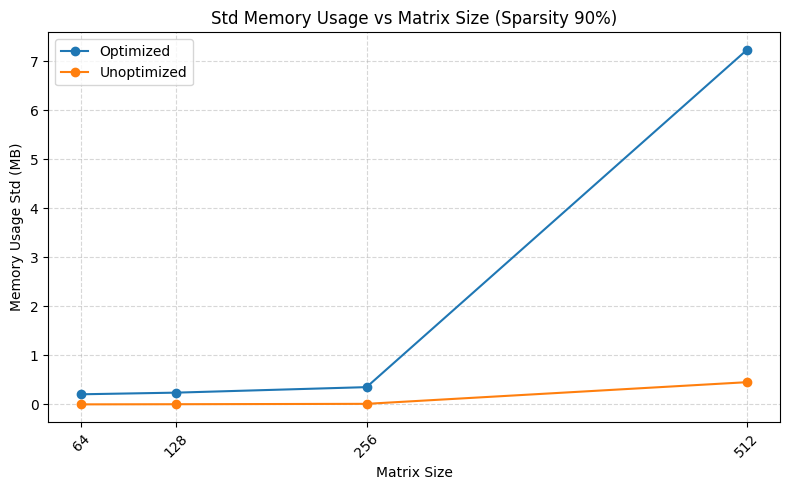

In [101]:
# Filter for sparsity 90
df_sparsity90 = agg_df[agg_df['sparse_level_percent'] == 90]

# Sort by matrix size to ensure correct order
df_sparsity90 = df_sparsity90.sort_values('matrix_size')

# Extract memory usage standard deviation
optimized_memory_std = df_sparsity90[df_sparsity90['implementation'] == 'optimized']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity90[df_sparsity90['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity90['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage std (MB):", optimized_memory_std)
print("Unoptimized memory usage std (MB):", unoptimized_memory_std)

# Plot the memory usage standard deviation
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized', 'Unoptimized'],
    title='Std Memory Usage vs Matrix Size (Sparsity 90%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_std_vs_size_sparsity90.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory usage: [0.0, 0.2817, 1.7955999999999999, 14.055714285714286]
Unoptimized memory usage: [0.037, 0.13090000000000002, 0.5142, 1.9702000000000002]
Plot saved to ./graphs\memory_mean_vs_size_sparsity95.png


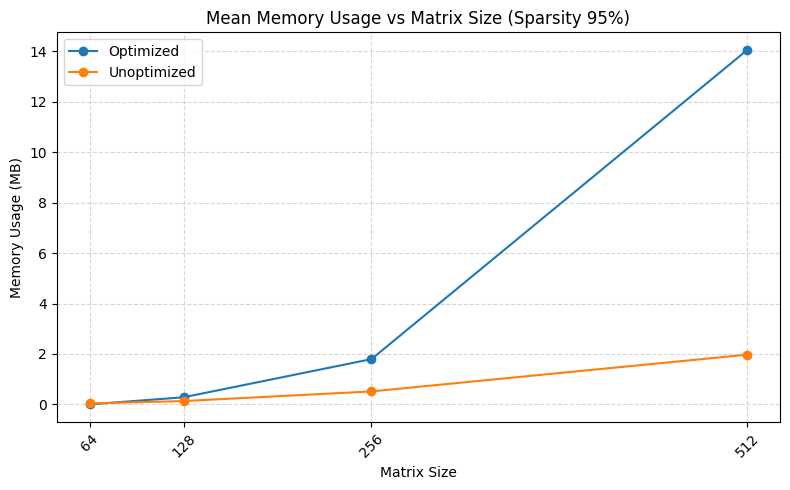

In [102]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract memory usage
optimized_memory = df_sparsity95[df_sparsity95['implementation'] == 'optimized']['memory_usage_mb_mean'].tolist()
unoptimized_memory = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage:", optimized_memory)
print("Unoptimized memory usage:", unoptimized_memory)

# Plot memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory, unoptimized_memory],
    labels=['Optimized', 'Unoptimized'],
    title='Mean Memory Usage vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_mean_vs_size_sparsity95.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) median memory usage (MB): [0.0, 0.0, 1.9955, 14.125]
Unoptimized median memory usage (MB): [0.037, 0.13, 0.518, 1.958]


Plot saved to ./graphs\memory_median_vs_size_sparsity95.png


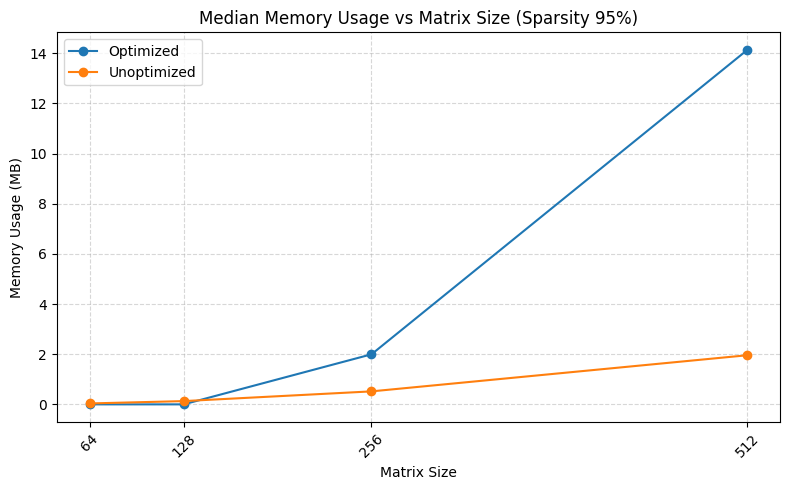

In [103]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract median memory usage
optimized_memory_median = df_sparsity95[df_sparsity95['implementation'] == 'optimized']['memory_usage_mb_median'].tolist()
unoptimized_memory_median = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['memory_usage_mb_median'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) median memory usage (MB):", optimized_memory_median)
print("Unoptimized median memory usage (MB):", unoptimized_memory_median)

# Plot the median memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory_median, unoptimized_memory_median],
    labels=['Optimized', 'Unoptimized'],
    title='Median Memory Usage vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='memory_median_vs_size_sparsity95.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized (Strassen) memory usage std (MB): [0.0, 0.37441986236487684, 0.393882441570804, 0.16250406588320018]
Unoptimized memory usage std (MB): [0.0, 0.0023781411975649365, 0.010580905233275458, 0.023550418727110157]
Plot saved to ./graphs\memory_std_vs_size_sparsity95.png


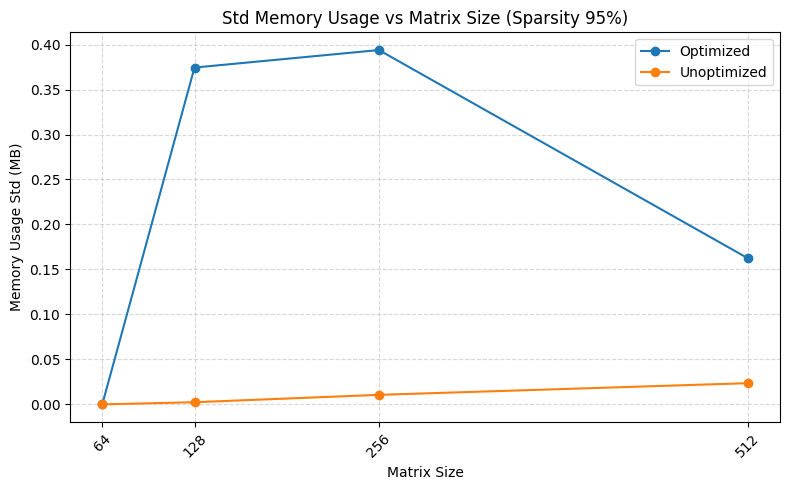

In [104]:
# Filter for sparsity 95
df_sparsity95 = agg_df[agg_df['sparse_level_percent'] == 95]

# Sort by matrix size to ensure correct order
df_sparsity95 = df_sparsity95.sort_values('matrix_size')

# Extract memory usage standard deviation
optimized_memory_std = df_sparsity95[df_sparsity95['implementation'] == 'optimized']['memory_usage_mb_std'].tolist()
unoptimized_memory_std = df_sparsity95[df_sparsity95['implementation'] == 'unoptimized']['memory_usage_mb_std'].tolist()

# Extract matrix sizes for x-axis
sizes = df_sparsity95['matrix_size'].unique().tolist()

# Print results
print("Matrix sizes:", sizes)
print("Optimized (Strassen) memory usage std (MB):", optimized_memory_std)
print("Unoptimized memory usage std (MB):", unoptimized_memory_std)

# Plot the memory usage std
plot_lines(
    x=sizes,
    y=[optimized_memory_std, unoptimized_memory_std],
    labels=['Optimized', 'Unoptimized'],
    title='Std Memory Usage vs Matrix Size (Sparsity 95%)',
    xlabel='Matrix Size',
    ylabel='Memory Usage Std (MB)',
    file_name='memory_std_vs_size_sparsity95.png',
)


Matrix sizes: [64, 128, 256, 512]
Optimized memory usage (MB): [0.1984, 1.1326, 4.3893, 24.4996]
Theoretical Strassen memory (MB): [np.float64(0.24576000000000003), np.float64(1.1468800000000001), np.float64(5.24288), np.float64(23.59296)]
Plot saved to ./graphs\comparison_optimized_memory_vs_theoretical_complexity.png


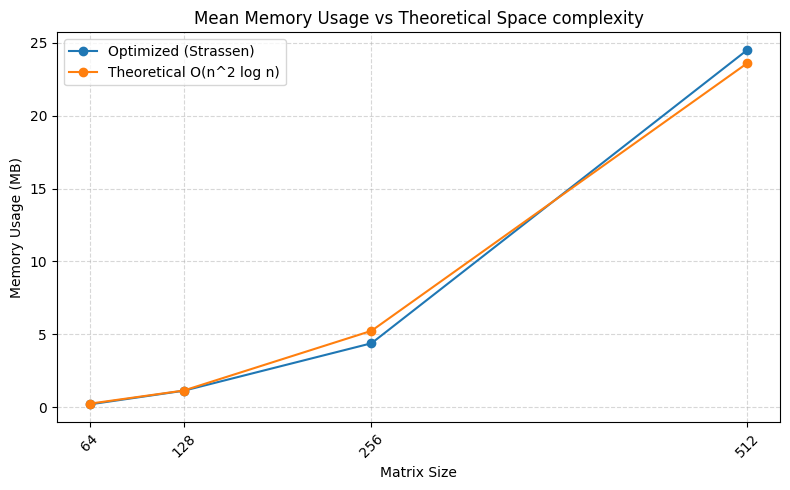

In [105]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Extract optimized memory usage
optimized_memory = df_sparsity0[df_sparsity0['implementation'] == 'optimized']['memory_usage_mb_mean'].tolist()

# Compute theoretical Strassen memory: O(n^2 log n)
# Scale factor chosen to roughly match observed memory usage (can adjust)
scale_factor = 1e-5
theoretical_memory = [n**2 * np.log2(n) * scale_factor for n in sizes]

# Print results
print("Matrix sizes:", sizes)
print("Optimized memory usage (MB):", optimized_memory)
print("Theoretical Strassen memory (MB):", theoretical_memory)

# Plot the memory usage
plot_lines(
    x=sizes,
    y=[optimized_memory, theoretical_memory],
    labels=['Optimized (Strassen)', 'Theoretical O(n^2 log n)'],
    title='Mean Memory Usage vs Theoretical Space complexity',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='comparison_optimized_memory_vs_theoretical_complexity.png',
)


Matrix sizes: [64, 128, 256, 512]
Unoptimized memory usage (MB): [0.3479, 1.2571999999999999, 4.013, 15.168600000000001]
Theoretical naive memory (MB): [4.096, 16.384, 65.536, 262.144]
Plot saved to ./graphs\comparison_unoptimized_memory_vs_theoretical_complexity.png


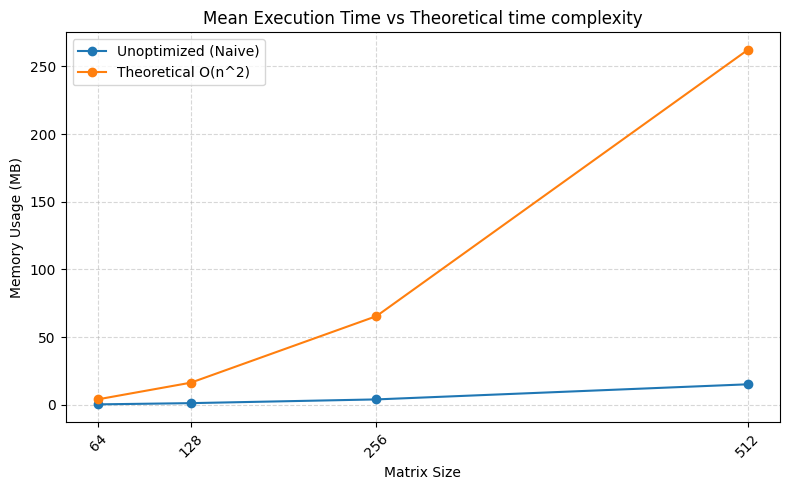

In [106]:
# Filter for sparsity 0
df_sparsity0 = agg_df[agg_df['sparse_level_percent'] == 0]

# Sort by matrix size
df_sparsity0 = df_sparsity0.sort_values('matrix_size')

# Extract matrix sizes
sizes = df_sparsity0['matrix_size'].unique().tolist()

# Extract unoptimized memory usage
unoptimized_memory = df_sparsity0[df_sparsity0['implementation'] == 'unoptimized']['memory_usage_mb_mean'].tolist()

# Compute theoretical naive memory complexity: O(n^2)
# Scale factor chosen to roughly match observed memory usage
scale_factor = 1e-3
theoretical_naive_memory = [scale_factor * (n ** 2) for n in sizes]

# Print results
print("Matrix sizes:", sizes)
print("Unoptimized memory usage (MB):", unoptimized_memory)
print("Theoretical naive memory (MB):", theoretical_naive_memory)

# Plot the memory usage
plot_lines(
    x=sizes,
    y=[unoptimized_memory, theoretical_naive_memory],
    labels=['Unoptimized (Naive)', 'Theoretical O(n^2)'],
    title='Mean Execution Time vs Theoretical time complexity',
    xlabel='Matrix Size',
    ylabel='Memory Usage (MB)',
    file_name='comparison_unoptimized_memory_vs_theoretical_complexity.png',
)
